# ARMA 모델링 실습

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# 시계열 데이터 생성
np.random.seed(0)
n = 100 #데이터 포인트 수 
ar_params = [0,7] #자기회귀 계수
ma_params = [0.4, -0.2]
residuals = np.random.normal(0, 1, n) #전차 생성

In [5]:
#ARMA (1,2) 모델 생성
data = [0,0] #초기값 설정
for i in range(2,n):
    ar_term = ar_params[0] * data[i-1]
    ma_term = ma_params[0] + residuals[i-1] + ma_params[1] * residuals[i-2]
    data.append(ar_term + ma_term + residuals[i] )

In [8]:
#데이터프레임 생성
df = pd.DataFrame({'Value' : data})
print(df)

       Value
0   0.000000
1   0.000000
2   1.426085
3   3.539600
4   4.312704
..       ...
95  1.267612
96  1.045800
97  2.055056
98  2.310683
99  0.571727

[100 rows x 1 columns]


In [10]:
# ARMA (1,2) 모델 적합
model = ARIMA(df['Value'], order=(1,0,2))
results = model.fit()

#ARMA(1, 2) 모델 정보 출력
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -155.798
Date:                Thu, 01 Jun 2023   AIC                            321.595
Time:                        09:16:56   BIC                            334.621
Sample:                             0   HQIC                           326.867
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4523      0.197      2.294      0.022       0.066       0.839
ar.L1         -0.4714      0.860     -0.548      0.584      -2.158       1.215
ma.L1          1.2133      0.896      1.354      0.1

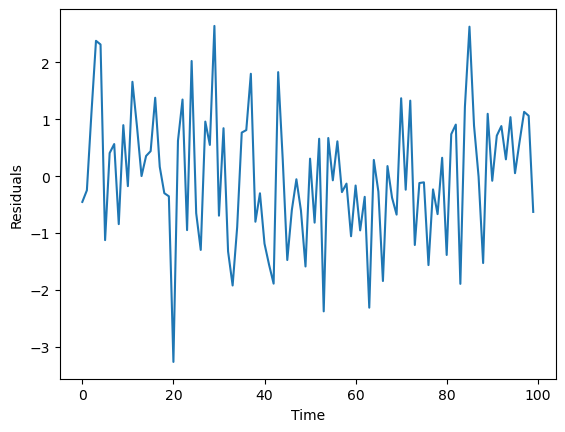

In [11]:
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

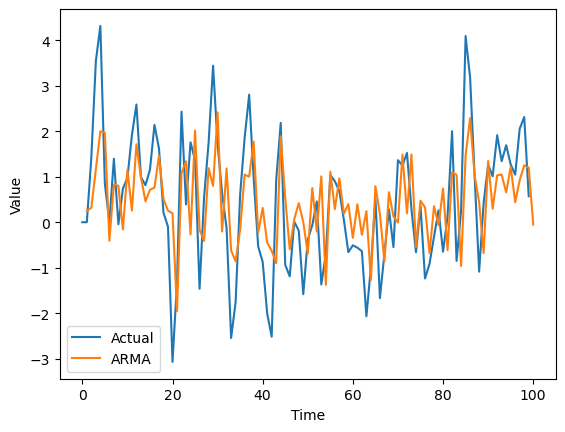

In [13]:
pred = results.predict(start=1, end=n)
plt.plot(df['Value'], label='Actual')
plt.plot(pred, label='ARMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()